In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from sklearn import preprocessing

/home/sean/anaconda3/lib/python3.5/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


## Brief view of data

In [2]:
data = pd.read_csv('Historical Product Demand.csv',index_col='Date',parse_dates=['Date'])

In [3]:
print(data.dtypes)
data.head()

Product_Code        object
Warehouse           object
Product_Category    object
Order_Demand        object
dtype: object


,Product_Code,Warehouse,Product_Category,Order_Demand
Date,,,,
2012-07-27,Product_0993,Whse_J,Category_028,100
2012-01-19,Product_0979,Whse_J,Category_028,500
2012-02-03,Product_0979,Whse_J,Category_028,500
2012-02-09,Product_0979,Whse_J,Category_028,500
2012-03-02,Product_0979,Whse_J,Category_028,500


In [4]:
data = data.fillna(method='ffill')
data['Order_Demand'].replace('[(]', '-', inplace=True, regex=True)
data['Order_Demand'].replace('[)]', '', inplace=True, regex=True)
data['Order_Demand'] = data['Order_Demand'].astype(int)

In [5]:
def plot(data, title):
    plt.figure(figsize=(8,4))
    plt.title(title) 
    plt.xlabel("Year")
    ax1 = sns.barplot(x=data.index, y="Order_Demand", data=data)
    ax1.set_xticks([200, 500, 800, 1100, 1400, 1700]) 
    ax1.set_xticklabels(["2012", "2013", "2014", "2015", "2016", "2017"])
    plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
    plt.show()

/home/sean/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


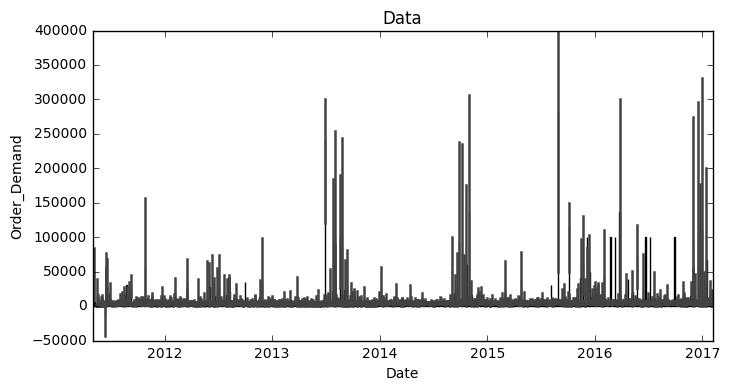

In [6]:
plot(data, "Data")

/home/sean/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


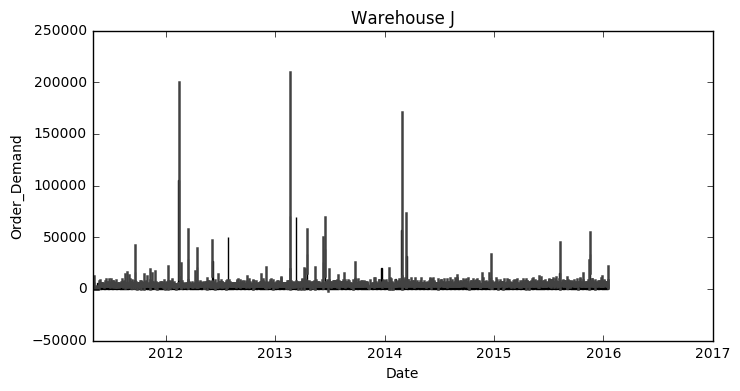

In [7]:
plot(data.loc[data["Warehouse"] == "Whse_J"], "Warehouse J")

/home/sean/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


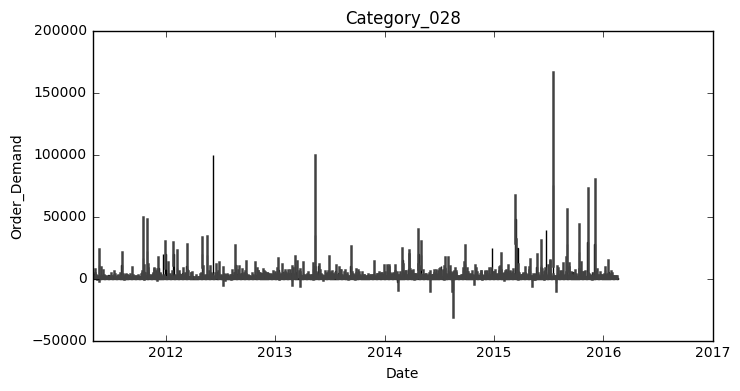

In [8]:
plot(data.loc[data["Product_Category"] == "Category_028"], "Category_028")

## Regression

+ Generate data set for training

In [9]:
print(data.dtypes)
data.head()

Product_Code        object
Warehouse           object
Product_Category    object
Order_Demand         int64
dtype: object


,Product_Code,Warehouse,Product_Category,Order_Demand
Date,,,,
2012-07-27,Product_0993,Whse_J,Category_028,100
2012-01-19,Product_0979,Whse_J,Category_028,500
2012-02-03,Product_0979,Whse_J,Category_028,500
2012-02-09,Product_0979,Whse_J,Category_028,500
2012-03-02,Product_0979,Whse_J,Category_028,500


In [10]:
#Convert data type to int
data["Product_Code"] = data["Product_Code"].str[8:].astype(int)
data["Product_Category"] = data["Product_Category"].str[9:].astype(int)
#One-hot encode
data = pd.get_dummies(data, columns=["Warehouse"], sparse=True)

In [11]:
data = data.reset_index(drop= True)

In [12]:
data.head()

,Product_Code,Product_Category,Order_Demand,Warehouse_Whse_A,Warehouse_Whse_C,Warehouse_Whse_J,Warehouse_Whse_S
0,993.0,28.0,100.0,0.0,0.0,1.0,0.0
1,979.0,28.0,500.0,0.0,0.0,1.0,0.0
2,979.0,28.0,500.0,0.0,0.0,1.0,0.0
3,979.0,28.0,500.0,0.0,0.0,1.0,0.0
4,979.0,28.0,500.0,0.0,0.0,1.0,0.0


In [13]:
from sklearn.model_selection import train_test_split
features = [i for i in data.columns.tolist() if (i != "Order_Demand")]
target = ['Order_Demand']
data_X = data[features]
data_y = data[target]
X_train,X_test,y_train,y_test = train_test_split(data_X, data_y, test_size=0.20, random_state=61)

In [14]:
#Tree-based DecisionTree
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(random_state=61)
reg.fit(X_train, y_train)
predict = reg.predict(X_test)
print("DecisionTree")
print("socre:",reg.score(X_test, y_test))

DecisionTree
socre: 0.27596899648


In [15]:
#Tree-based RandomForest
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=50, random_state=61, n_jobs=-1)
reg.fit(X_train, y_train)
predict = reg.predict(X_test)
print("RandomForest")
print("socre:",reg.score(X_test, y_test))

/home/sean/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForest
socre: 0.27567061096


In [18]:
#Ensemble method
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(n_estimators=50, random_state=61)
reg.fit(X_train, y_train)
predict = reg.predict(X_test)
print("GradientBoostingRegressor")
print("socre:",reg.score(X_test, y_test))

/home/sean/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor
socre: 0.192075515127


### The performance of tree-based method and GDBoosting are both not well